In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Detecting outliers using Z-score. 
Datapoints beyond the 3rd std in bell curve can be considered outliers.

In [18]:
dataset = [11,10,12,14,12,15,102,13,16,18,22,19,20,199,13,9,10,17,15,16,122,12,11,9,10,15,15,14,16,187]

In [19]:
outliers=[]

In [20]:
def detect_outliers(dataset):
  threshold = 3
  mean = np.mean(dataset)
  std = np.std(dataset)

  for i in dataset:
    z_score = (i - mean) / std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [21]:
detect_outliers(dataset)

[199, 187]

Detecting outliers using IQR

In [22]:
outliers_IQR = []

In [25]:
def detect_outliers_IQR(dataset):
  dataset = sorted(dataset)
  Q1, Q3 = np.percentile(dataset,[25,75])
  IQR = Q3 - Q1
  lower_fence = Q1 - 1.5*IQR
  higher_fence = Q3 + 1.5*IQR

  for i in dataset:
    if i < lower_fence or i > higher_fence:
      outliers_IQR.append(i)

  return outliers_IQR

In [26]:
detect_outliers_IQR(dataset)

[102, 122, 187, 199]

In [27]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


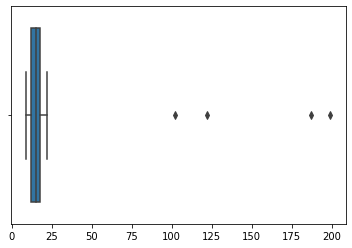

In [28]:
sns.boxplot(dataset)